In [2]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("factbook.db")
q = "Select * from sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
q2 = "Select * from facts limit 5"
pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
q3 = "Select Min(population),Max(population),Min(population_growth),Max(population_growth) from facts"
pd.read_sql_query(q3, conn)

,Min(population),Max(population),Min(population_growth),Max(population_growth)
0,0,7256490011,0.0,4.02


In [5]:
q4 = "Select * from facts where (population = 0) | (population =7256490011)"
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None


# Histograms

Antartica has zero population and the world population is marked as 7 billion.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f463dc22b00>,
      dtype=object)

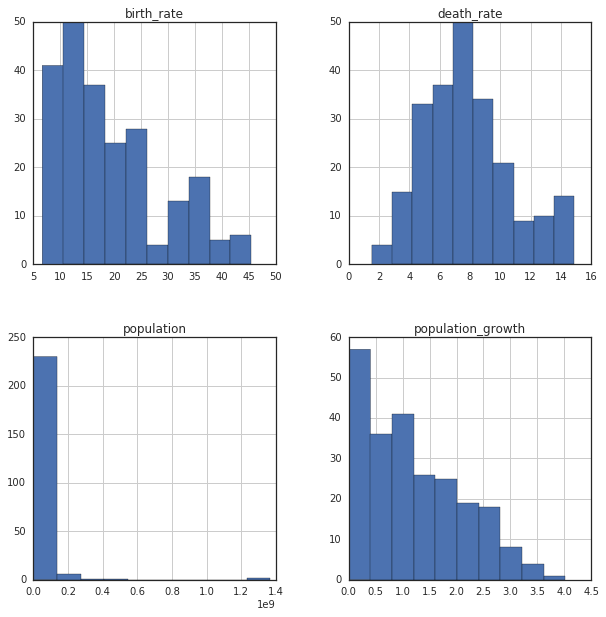

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white",{'axes.grid' : False})
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(222)

q1 = "Select population,population_growth,birth_rate,death_rate from facts where (population > 0) & (population <7256490011) "
pd.read_sql_query(q1,conn).hist(ax = ax)



# Which countries have the highest population density?

In [57]:
q = "Select name, Round(Cast(population as float)/Cast(area as float),1) p_density from facts order by p_density DESC"
pd.read_sql_query(q,conn)

,name,p_density
0,Macau,21169.0
1,Monaco,15267.5
2,Singapore,8141.3
3,Hong Kong,6445.0
4,Gaza Strip,5191.8
5,Gibraltar,4876.3
6,Bahrain,1771.9
7,Maldives,1319.6
8,Malta,1310.0
9,Bermuda,1299.9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f463c206898>]],
      dtype=object)

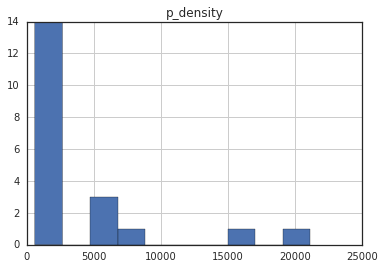

In [77]:
pd.read_sql_query(q,conn).hist()

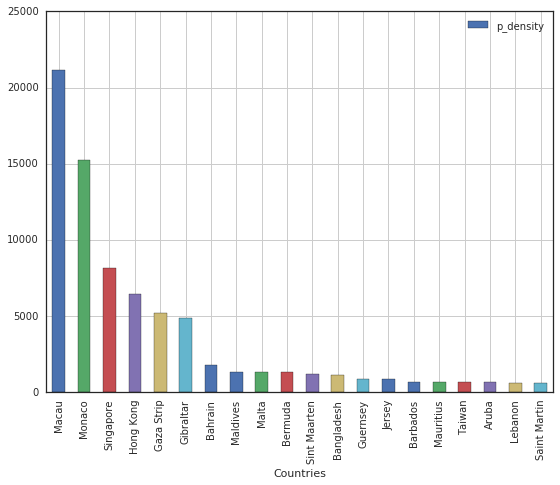

In [78]:
q = "Select name, Round(Cast(population as float)/Cast(area as float),1) p_density from facts order by p_density DESC Limit 20"
fig= plt.figure(figsize = (20,15))
ax = fig.add_subplot(222)
pd.read_sql_query(q,conn).plot.bar(x= "name", y = "p_density", ax = ax)
ax.grid(True)
plt.xlabel('Countries')